# Journal de bord 

SAUTRON Manish maharivana - 40001723

Projet python, partie sauvegarde des données et utilisation des données de l'utilisateur

## Modules de sauvegarde testés

Plusieurs façons de sauvegarder les données générées par le logiciel ont été testées afin de déterminer celle qui était plus adaptée au logiciel.

### 1. Pickle
#### Utiliser **Pickle** 

Le module Pickle permet de sauvegarder (sérialiser) le contenu d'un objet dans un fichier afin de pouvoir le recharger plus tard :

Avec le module :"pickle.dump(obj, file)"
puis "pickle.load(file)"

-Lien pickle: https://docs.python.org/3/library/pickle.html
-github: https://github.com/python/cpython/blob/3.9/Lib/pickle.py

In [ ]:
import pickle

user = { 'poids': 50, 'taille': 175}

with open("user.txt", "wb") as tf:
    pickle.dump(user,tf)

### 2. JSON
Une autre méthode pour enregistrer un dictionnaire dans un fichier en Python est d’utiliser la fonction dump() du module json

Sauvegarder un dictionnaire Python en fichier json: json.dump()

In [ ]:
with open('nomfichier.json', 'w') as f:
  json.dump(data, f, indent=2)

-Charger un fichier json en un dictionnaire python : json.load

In [ ]:
    with open('nomfichier.json', 'r') as f:
      data = json.load(f)

Exemple testé:

In [ ]:
import json

dict = {"poids" : {"kg": 2048},
        "tailles" : {"cm": 21},
        "nutrition_s" : {"jsp": 564},
        "nutriscore_s" : {"jsp": 47584}}

with open('data.txt', 'w') as fp:
    json.dump(dict, fp,  indent=4)

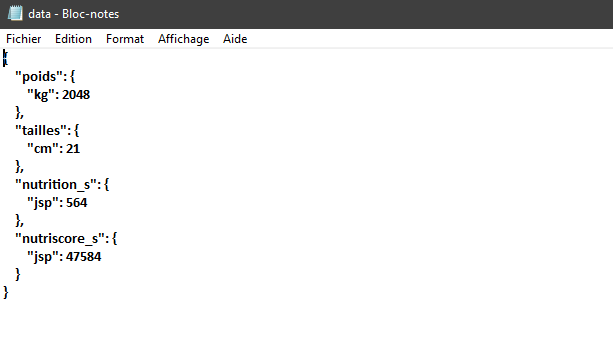

### 3. Fichier CSV

La fonction principale des **fichiers CSV** est de permettre la portabilité des données tabulaires d'un programme à l'autre. On a donc choisi d'utiliser la sauvegarde dans un fichier CSV car l'accès aux données est beaucoup plus pratique et ordonnée, notamment grâce aux liste de dictionnaires que nous pouvons extraire grâce à `csv.reader`.

Code pour la lecture du dictionnaire dans les fichier CSV :

In [ ]:
import csv

with open("my_input_file.txt", "r") as f:
   reader = csv.reader(f, delimiter=":")
   lines = list(reader)

Code pour créer le fishier csv puis sauvegarder un dictionnaire dans le fichier csv:

In [ ]:
with open("my_output_file.txt", "w") as f:
   writer = csv.writer(f, delimiter=":")
   writer.writerows(lines)

# Partie sauvegarde des données 

Cette partie a donc pour but de collecter les données de l'utilisateur pour les stocker dans un fichier afin de pouvoir les réutiliser pour des futurs traitements des mêmes données.

## Création du fichier de sauvegarde du profil
On a donc créé une fonction qui collecte les informations de l'utilisateur nécessaires pour le fonctionnement du logiciel, sous forme d'un dictionnaire python pour ensuite le sauvegarder dans un fichier CSV.

La fonction suivante va vérifier la présence d'un fichier de sauvegarde, et si celui-ci n'existe pas, la fonction va créer et préparer le fichier de sauvegarde. Elle va notamment mettre les en-tête correspondant aux clés du dictionnaire chargé de stocker les informations d'un profil utilisateur.

In [ ]:
def save_exist():
    """Fonction créant un fichier de sauvegarde si non existant"""
    if not os.path.isfile("users_save.csv"):   #verifie l'existence du fichier
        with open("users_save.csv", 'a', newline='') as file:   # création du fichier
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "nutriscore", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)  # prépare l'écriture du fichier 
            writer.writeheader()  # écrit les en-têtes

## Mise en place de la classe User
L'utilisation de cette classe est essentielle dans ce logiciel. En effet, elle permet de charger dans le programme les informations d'un ou plusieurs utilisateurs, qui pourront être utilisées au sein du programme. Par exemple, si nous déclarons un utilisateur de cette manière :

`profil1 = User("Manish", "Sautron", (09, 08, 2002), 'H', '', '', 60, 170, '')`

Nous pourrons simplement récupérer le prénom en avec la commande `profil1.prenom`, il va de même pour toutes les autres données présentes dans cette classe, à savoir :
- prenom : prénom de l'utilisateur sous forme de str
- nom : nom de l'utilisateur so : date de naissance de l'utilisateur sous forme d'un ensemble ou d'une liste dans le format jj mm yyyy
- sexe : sexe de l'utilisateur sous forme de str
- nutrition : données nutritionnelles de l'utilisateur sous forme de dictionnaire (vide si création du profil)
- poids : données pondérales de l'utilisateur sous forme de dictionnaire
- taille : données de la taille de l'utilisateur sous forme de dictionnaire
- imc : imc de l'utilisateur sous forme de dictionnaire (directement calculé en fontion du poids et de la taille si création du profil
- age : calculé automatiquement avec la date de naissance et le jour de l'utilisation du programme

Dans cette classe, nous créeons deux fonctions permettant d'éditer le fichier de sauvegarde avec les données de l'utilisteur, à tout moment dans le logiciel.

La fonction `add_user` va écrire les données de l'utilisateur dans le fichier de sauvegarde, s'il s'agit de sa première utilisation. Elle va préparer les dictionnaires nécessaires pour le fonctionnement du logiciel.

La fonction `save` va sauvegarder le profil qui était chargé dans le logiciel. Cette fonction sera exécutée à la fin du logiciel. Elle fera attention de remplacer **uniquement** les données de l'utilisateur actuel, pour le faire, elle prend en argument le prenom et le nom de l'utilisateur actuel pour repérer le dictionnaire à remplacer dans la sauvegarde, et ne pas toucher aux dictionnaires des autres utilisateurs.

In [ ]:
class User:
    def __init__(self, prenom, nom, naissance, sexe, nutrition, poids, taille, imc):
        self.prenom = prenom
        self.nom = nom
        self.naissance = naissance # au format [jj, mm, yyyy]
        self.sexe = sexe  # 'H' ou 'F'
        self.nutrition = nutrition
        self.taille = taille  # taille en cm
        self.poids = poids  # poids en kg
        self.age = (jour_brut - date(int(self.naissance[2]), int(self.naissance[1]),
                                     int(self.naissance[0]))).days // 365  # age calculé en fonction de la date saisie
        if type(poids) == dict and type(taille) == dict and imc == '':
            dates = list(poids)
            dates = sorted(dates)
            self.imc = {jour: calcul_IMC(poids[dates[len(dates)-1]], taille[dates[len(dates)-1]])}
        elif type(imc) == dict:
            self.imc = imc
        else:
            self.imc = {jour: calcul_IMC(poids, taille)}

    def add_user(self):
        """Fonction ajoutant un nouvel utilisateur s'il n'existait pas, et prépare les différents éléments"""
        # création de dictionnaires pour chaque caractéristiques à sauvegarder, avec en clé une date et en valeurs les
        # valeurs correspondantes
        poids_u = {}
        taille_u = {}
        imc_u = {}
        nutrition_u = {}
        val = {}
        for i in liste_nutriments:
            val[i] = 0
        nutrition_u[jour] = val
        poids_u[jour] = self.poids
        taille_u[jour] = self.taille
        self.poids = poids_u
        self.taille = taille_u
        self.nutrition = nutrition_u
        new_user = {"prenom": self.prenom, "nom": self.nom, "naissance": self.naissance, "sexe": self.sexe,
                    "nutrition": self.nutrition, "poids": self.poids,
                    "taille": self.taille, "imc": self.imc, "date_modif": jour}
        save_exist()
        with open("users_save.csv", 'a', newline='') as file:
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)
            writer.writerow(new_user)

    def save(self, prenom, nom):
        """Fonction prenant en argument le prenom et le nom du profil dont les nouvelles informations doivent être
        sauvegardées"""
        sans_modif = []
        with open("users_save.csv", "r") as file:
            for i in list(csv.DictReader(file, delimiter=',')):
                if i["prenom"] != prenom and i["nom"] != nom:
                    sans_modif.append(i)
        with open("users_save.csv", "w") as file:
            champs = ["prenom", "nom", "naissance", "sexe", "nutrition", "poids", "taille", "imc",
                      "date_modif"]
            writer = csv.DictWriter(file, fieldnames=champs)
            writer.writeheader()
            for i in sans_modif:
                writer.writerow(i)
            writer.writerow({"prenom": self.prenom, "nom": self.nom, "naissance": self.naissance, "sexe": self.sexe,
                             "nutrition": self.nutrition, "poids": self.poids,
                             "taille": self.taille, "imc": self.imc, "date_modif": jour})

## Sélection du profil
Le logiciel doit être capable de gérer plusieurs profils d'utilisateur différents. Cependant, lors du démarrage, il doit charger les données correspondant à la personne qui utilise le logiciel. Nous devons donc créer une fonction demandant à l'utilisateur de sélectionner son profil, puis chargeant à l'aide de la classe **User** les données de l'utilisateur. Commençons d'abord par travailler sur la partie affichant et demandant la sélection à l'utilisateur.
### Fonction selection_profil

Cette fonction doit lire le fichier de sauvegarde et afficher le prénom et le nom de chaque profil d'utilisateur dans une liste numérotée. Elle demande ensuite via un `input` la sélection de l'utilisateur et retourne le dictionnaire du profil choisi.

In [ ]:
def selection_profil():
    """Fonction permettant de demander et récupérer les informations du profil d'un utilisateur"""
    if os.path.isfile("users_save.csv"):
        compteur = 1 # permet de créer la liste numérotée
        with open("users_save.csv", "r") as file:
            liste = list(csv.DictReader(file, delimiter=','))
            for i in liste:
                print(str(compteur) + '. ' + i["prenom"] + ' ' + i["nom"])
                compteur += 1
        selection = int(input("Entrez votre sélection : "))
        return liste[selection - 1]
    else:
        print("Aucun profil enregistré")

Enfin nous avons une fonction charge_profil consistant à récupérer les données du dictionnaire d'un utilisateur via la fonction présentée ci-dessus et retourner un profil chargé dans la classe User.

In [ ]:
def charge_profil():
    use = selection_profil()
    # récupération données depuis une sauvegarde existante
    user_select = User(use["prenom"], use["nom"], ast.literal_eval(use["naissance"]), use["sexe"],
                ast.literal_eval(use["nutrition"]), ast.literal_eval(use["poids"]),
                ast.literal_eval(use["taille"]), ast.literal_eval(use["imc"]))
    return user_select